In [1]:
from udntools.region import ServiceRegion
from udntools.channel import BaseChannel
from udntools.utils.plot import get_circle
#import warnings
#warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from udntools.utils import cdf_y_axis
import matplotlib

In [2]:
region = ServiceRegion(0, 100,
                       0, 100,
                       12, 100000,
                       bs_distribution="square_grid",
                       grid_l_1=20,
                       grid_l_2=20,
                       if_fix_bs=False)
channel = BaseChannel(4.0)

In [3]:
l1_l2_array = np.array([[10, 10], [10, 20], [20, 20]])
marker_array = ['o', 's', '>']

In [4]:
# 设定仿真的信干比区间
x_axis = np.arange(-10, 21, 1)

cdf_shape = np.shape(x_axis)[0]
curves = np.zeros((3, cdf_shape))

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


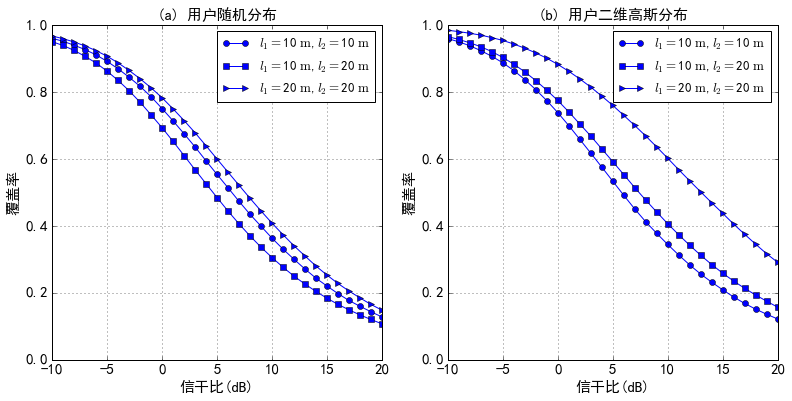

In [5]:
import matplotlib
params = {'axes.labelsize': 15,'axes.titlesize':10, 'text.fontsize': 15, 'legend.fontsize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
matplotlib.rcParams.update(params)
# 图片大小
fig = plt.figure(figsize=(13, 6))
# 使能中文字体
# -*- coding:utf-8 -*-
plt.subplot(121)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

region.set_ue_distribution('uniform')

for i in range(3):
    region.set_bs_grid_l1_l2(l1_l2_array[i,0], 
                             l1_l2_array[i,1])
    sir_user_sim =10 * np.log10(
                 channel.sir_vector(region.bs_position_,
                                    region.ue_position_))
    curves[i,:] = 1 - cdf_y_axis(x_axis, sir_user_sim)
    f, = plt.plot(x_axis, 
                  curves[i, :],
                  color='b',
                  marker=marker_array[i],
                          label='$l_1=$%s$\ \mathrm{m}$,$l_2=$%s$\ \mathrm{m}$'%(l1_l2_array[i,0], l1_l2_array[i,1]))
    plt.legend(loc='best', prop={'size': 13})
# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', fontsize=15)
plt.ylabel("覆盖率",fontproperties = 'SimHei', fontsize=15)

plt.xlim(-10, 20)
plt.ylim(0,1.0)
plt.grid(True)
plt.title("(a) 用户随机分布",fontproperties = 'SimHei', size=15)


plt.subplot(122)
region.set_ue_distribution('gaussian')
region.set_ue_sigma(5.0)

for i in range(3):
    region.set_bs_grid_l1_l2(l1_l2_array[i,0], 
                             l1_l2_array[i,1])
    sir_user_sim =10 * np.log10(
                 channel.sir_vector(region.bs_position_,
                                    region.ue_position_))
    curves[i,:] = 1 - cdf_y_axis(x_axis, sir_user_sim)
    f, = plt.plot(x_axis, 
                  curves[i, :],
                  color='b',
                  marker=marker_array[i],
                          label='$l_1=$%s$\ \mathrm{m}$,$l_2=$%s$\ \mathrm{m}$'%(l1_l2_array[i,0], l1_l2_array[i,1]))
    plt.legend(loc='best', prop={'size': 13})
# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', fontsize=15)
plt.ylabel("覆盖率",fontproperties = 'SimHei', fontsize=15)

plt.xlim(-10, 20)
plt.ylim(0,1.0)
plt.grid(True)
plt.title("(b) 用户二维高斯分布",fontproperties = 'SimHei', size=15)
fig.savefig('pc_square_grid_l12.pdf')
fig.savefig('pc_square_grid_l12.png')
                
plt.show()

In [6]:
l1_array = np.arange(5, 26, 1)
l2_array = np.arange(5, 26, 1)

L1, L2 = np.meshgrid(l1_array, l2_array)
pc_0_db_uniform = np.zeros((np.shape(l1_array)[0],
                            np.shape(l1_array)[0]))
pc_3_db_uniform = np.zeros((np.shape(l1_array)[0],
                            np.shape(l1_array)[0]))
pc_5_db_uniform = np.zeros((np.shape(l1_array)[0],
                            np.shape(l1_array)[0]))

pc_0_db_gaussian = np.zeros((np.shape(l1_array)[0],
                             np.shape(l1_array)[0]))
pc_3_db_gaussian = np.zeros((np.shape(l1_array)[0],
                             np.shape(l1_array)[0]))
pc_5_db_gaussian = np.zeros((np.shape(l1_array)[0],
                             np.shape(l1_array)[0]))

channel = BaseChannel(4.0)
region.set_ue_distribution('uniform')

for i, value_i in enumerate(l1_array):
    for j, value_j in enumerate(l2_array):
        region.set_bs_grid_l1_l2(value_i, value_j)
        sir_user_sim =10 * np.log10(
             channel.sir_vector(region.bs_position_,
                                region.ue_position_))
        pc_0_db_uniform[i, j] = np.size(np.argwhere(sir_user_sim > 0)) \
                                / region.ue_number_ / 2
        
        pc_3_db_uniform[i, j] = np.size(np.argwhere(sir_user_sim > 3)) \
                                / region.ue_number_ / 2
        pc_5_db_uniform[i, j] = np.size(np.argwhere(sir_user_sim > 5)) \
                                / region.ue_number_ / 2

region.set_ue_distribution('gaussian')
region.set_ue_sigma(5.0)

for i, value_i in enumerate(l1_array):
    for j, value_j in enumerate(l2_array):
        region.set_bs_grid_l1_l2(value_i, value_j)
        sir_user_sim =10 * np.log10(
             channel.sir_vector(region.bs_position_,
                                region.ue_position_))

        pc_0_db_gaussian[i, j] = np.size(np.argwhere(sir_user_sim > 0)) \
                                / region.ue_number_ / 2
        
        pc_3_db_gaussian[i, j] = np.size(np.argwhere(sir_user_sim > 3)) \
                                / region.ue_number_ / 2
        pc_5_db_gaussian[i, j] = np.size(np.argwhere(sir_user_sim > 5)) \
                                / region.ue_number_ / 2

/home/zoo2/Documents/UDNs/program/udntools/channel/base_channel.py:77: RuntimeWarning: divide by zero encountered in true_divide
  return np.reshape(power_vector / interference_vector, (1, -1))


/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


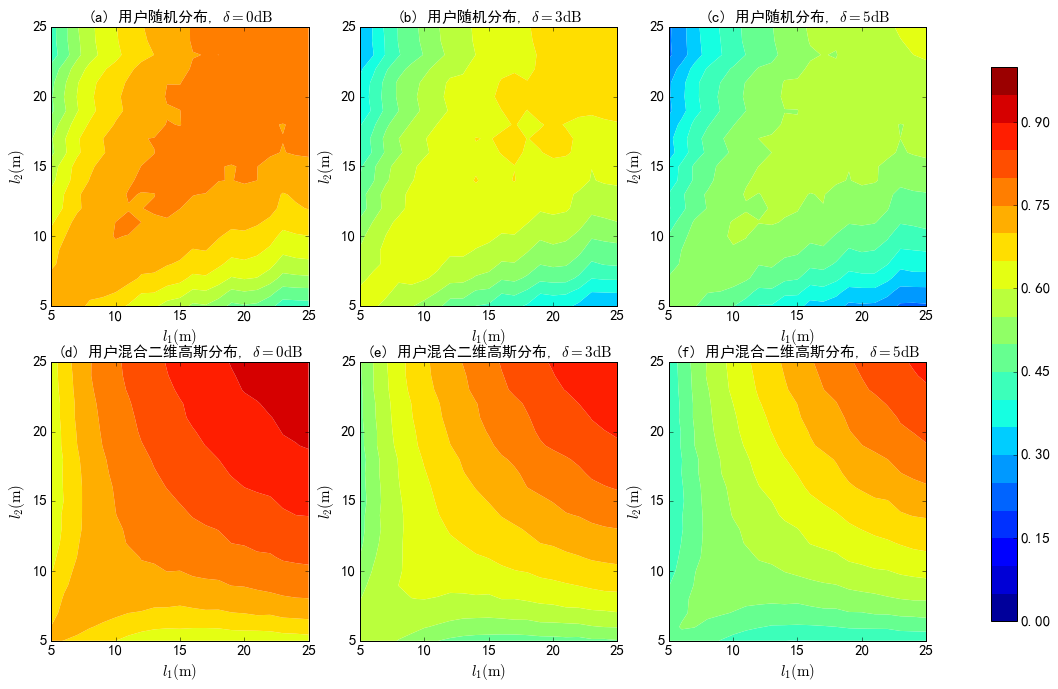

In [8]:
import matplotlib
params = {'axes.labelsize': 15,'axes.titlesize':15, 'legend.fontsize': 15}
matplotlib.rcParams.update(params)

fig = plt.figure(figsize=(18,11))  
ax = fig.add_subplot(231)
im1 = ax.contourf(L1, L2,pc_0_db_uniform,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(5,25)
plt.ylim(5,25)
plt.xlabel("$l_1(\mathrm{m})$")
plt.ylabel("$l_2(\mathrm{m})$")
plt.title("(a) 用户随机分布, $\delta=0\mathrm{dB}$",fontproperties = 'SimHei', size=15)

ax = fig.add_subplot(232)
im1 = ax.contourf(L1, L2,pc_3_db_uniform,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(5,25)
plt.ylim(5,25)
plt.xlabel("$l_1(\mathrm{m})$")
plt.ylabel("$l_2(\mathrm{m})$")

plt.title("(b) 用户随机分布, $\delta=3\mathrm{dB}$",fontproperties = 'SimHei', size=15)

ax = fig.add_subplot(233)
im1 = ax.contourf(L1, L2,pc_5_db_uniform,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(5,25)
plt.ylim(5,25)
plt.title("(c) 用户随机分布, $\delta=5\mathrm{dB}$",fontproperties = 'SimHei', size=15)
plt.xlabel("$l_1(\mathrm{m})$")
plt.ylabel("$l_2(\mathrm{m})$")


ax = fig.add_subplot(234)
im1 = ax.contourf(L1, L2,pc_0_db_gaussian,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)

plt.xlabel("$l_1(\mathrm{m})$")
plt.ylabel("$l_2(\mathrm{m})$")
plt.xlim(5,25)
plt.ylim(5,25)
plt.title("(d) 用户混合二维高斯分布, $\delta=0\mathrm{dB}$",fontproperties = 'SimHei', size=15)

ax = fig.add_subplot(235)
im1 = ax.contourf(L1, L2,pc_3_db_gaussian,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(5,25)
plt.ylim(5,25)
plt.title("(e) 用户混合二维高斯分布, $\delta=3\mathrm{dB}$",fontproperties = 'SimHei', size=15)
plt.xlabel("$l_1(\mathrm{m})$")
plt.ylabel("$l_2(\mathrm{m})$")

ax = fig.add_subplot(236)
im1 = ax.contourf(L1, L2,pc_5_db_gaussian,
                  np.linspace(0, 1, 21),
                  alpha=1,
                  antialiased=True)
plt.xlim(5,25)
plt.ylim(5,25)
plt.xlabel("$l_1(\mathrm{m})$")
plt.ylabel("$l_2(\mathrm{m})$")
plt.title("(f) 用户混合二维高斯分布, $\delta=5\mathrm{dB}$",fontproperties = 'SimHei', size=15)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im1, cax=cbar_ax)


fig.savefig('pc_square_grid_hot_map.pdf')
fig.savefig('pc_square_grid_hot_map.png')
plt.show()